In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

# 1) load the given dataset

In [2]:
df = pd.read_csv('titanic.csv')

# 2) print all the column names

In [3]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3) describe the data
4) check the null value
5) if there are Null values, Handle these

# 3) describe the data

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4) check the null value

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 5) if there are Null values, Handle these

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


#  Working with Models

1) Create the target data and feature data where target data is survived
2) Split the data into Training and testing Set
3) Create a Logistic regression model for Target and feature data
4) Display the Confusion Matrix
5) Find the Accuracy Score
6) Find the Precision Score
7) Find the Recall Score
8) Find the F1 Score
9) Find the probability of testing data
10) Display ROC Curve and find the AUC score 

# 1) Create the target data and feature data where target data is survived

In [9]:
X = df.drop(['Survived','Name','Ticket'],axis=1)
y = df.Survived

In [10]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,female,38.0,1,0,71.2833,C85,C
3,4,1,female,35.0,1,0,53.1000,C123,S
6,7,1,male,54.0,0,0,51.8625,E46,S
10,11,3,female,4.0,1,1,16.7000,G6,S
11,12,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,872,1,female,47.0,1,1,52.5542,D35,S
872,873,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,880,1,female,56.0,0,1,83.1583,C50,C
887,888,1,female,19.0,0,0,30.0000,B42,S


# 2) apply label-encoding on categorical data

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc =LabelEncoder()

In [13]:
X['Sex'] = enc.fit_transform(X['Sex'])

In [14]:
X['Cabin'] = enc.fit_transform(X['Cabin'])
X['Embarked'] = enc.fit_transform(X['Embarked'])

In [15]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,71.2833,72,0
3,4,1,0,35.0,1,0,53.1000,48,2
6,7,1,1,54.0,0,0,51.8625,117,2
10,11,3,0,4.0,1,1,16.7000,131,2
11,12,1,0,58.0,0,0,26.5500,43,2
...,...,...,...,...,...,...,...,...,...
871,872,1,0,47.0,1,1,52.5542,91,2
872,873,1,1,33.0,0,0,5.0000,29,2
879,880,1,0,56.0,0,1,83.1583,61,0
887,888,1,0,19.0,0,0,30.0000,25,2


# 3) Split the data into Training and testing Set 

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# 4) Create a Logistic regression model for Target and feature data

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Yogini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
clf.score(X_test,y_test)

0.6756756756756757

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [21]:
y_pred = clf.predict(X_test)

# 5) Display the Confusion Matrix

In [22]:
confusion_matrix(y_pred,y_test)

array([[ 4,  6],
       [ 6, 21]], dtype=int64)

# 6)  Find the Accuracy Score 

In [23]:
accuracy_score(y_pred,y_test)

0.6756756756756757

# 7) Find the Precision Score 

In [24]:
precision_score(y_pred,y_test)

0.7777777777777778

# 8) Find the Recall Score 

In [25]:
recall_score(y_pred,y_test)

0.7777777777777778

# 9) Find the F1 Score 

In [26]:
f1_score(y_pred,y_test)

0.7777777777777778

# 10) Find the probability of testing data 

In [27]:
y_prob = clf.predict_proba(X_test)

In [28]:
y_prob

array([[0.57807663, 0.42192337],
       [0.06212397, 0.93787603],
       [0.75852836, 0.24147164],
       [0.66738093, 0.33261907],
       [0.26617469, 0.73382531],
       [0.51263258, 0.48736742],
       [0.53518013, 0.46481987],
       [0.15204932, 0.84795068],
       [0.48668364, 0.51331636],
       [0.41066101, 0.58933899],
       [0.02347953, 0.97652047],
       [0.18046939, 0.81953061],
       [0.04956049, 0.95043951],
       [0.03304594, 0.96695406],
       [0.63514402, 0.36485598],
       [0.49608372, 0.50391628],
       [0.54193737, 0.45806263],
       [0.04239431, 0.95760569],
       [0.11511264, 0.88488736],
       [0.05637861, 0.94362139],
       [0.56043997, 0.43956003],
       [0.08946216, 0.91053784],
       [0.45624871, 0.54375129],
       [0.06099997, 0.93900003],
       [0.074724  , 0.925276  ],
       [0.0463369 , 0.9536631 ],
       [0.01991275, 0.98008725],
       [0.45904169, 0.54095831],
       [0.62526472, 0.37473528],
       [0.12510599, 0.87489401],
       [0.

# 11) Display ROC Curve and find the AUC score 

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

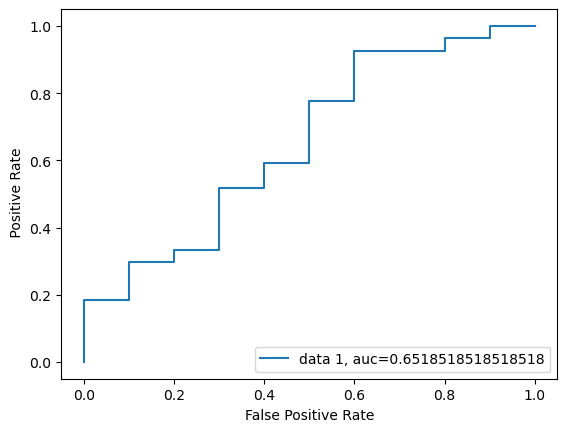

In [30]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()